<a href="https://colab.research.google.com/github/202311062-khushid/idm_assignment_1/blob/202311062/Predicting_finalist(Task_2)_and_predicting_winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting finalist and winner of Worldcup 2023

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

Importing data

In [ ]:
wc=pd.read_csv('/content/drive/MyDrive/dataminning/project3/World_cup_2023.csv')

Data Preprocessing

In [ ]:
wc.head()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


In [ ]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team_name           10 non-null     object 
 1   Team_ranking        10 non-null     int64  
 2   Titles              10 non-null     int64  
 3   Win_percentage_ODI  10 non-null     float64
 4   WC_matches          10 non-null     int64  
 5   WC_match_won        10 non-null     int64  
 6   Win_percent_WC      10 non-null     float64
 7   WC_match_loss       10 non-null     int64  
 8   Loss_percent_WC     10 non-null     float64
 9   Tied                10 non-null     int64  
 10  No_result           10 non-null     int64  
 11  World_cup_winner    10 non-null     object 
 12  Recent_points       10 non-null     int64  
 13  Rating              10 non-null     int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.2+ KB


In [ ]:
wc.describe()

,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,Recent_points,Rating
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,1.000000,48.935000,64.800000,36.200000,47.048000,26.800000,50.561000,0.800000,1.000000,2362.900000,96.800000
std,3.02765,1.563472,8.825435,29.199696,23.093048,22.737065,7.598245,23.829437,0.788811,0.666667,785.510655,23.436913
min,1.00000,0.000000,34.210000,15.000000,1.000000,6.660000,14.000000,24.460000,0.000000,0.000000,1044.000000,37.000000
25%,3.25000,0.000000,45.777500,46.000000,20.000000,38.125000,23.000000,36.215000,0.000000,1.000000,2011.500000,92.750000
50%,5.50000,0.500000,49.985000,79.500000,41.500000,57.395000,27.000000,39.525000,1.000000,1.000000,2438.500000,101.000000
75%,7.75000,1.000000,52.680000,83.750000,51.750000,60.345000,32.000000,59.062500,1.000000,1.000000,2774.000000,112.250000
max,10.00000,5.000000,61.000000,94.000000,69.000000,73.400000,39.000000,93.330000,2.000000,2.000000,3807.000000,118.000000


In [ ]:
wc.shape

(10, 14)

In [ ]:
wc.columns

Index(['Team_name', 'Team_ranking', 'Titles', 'Win_percentage_ODI',
       'WC_matches', 'WC_match_won', 'Win_percent_WC', 'WC_match_loss',
       'Loss_percent_WC', 'Tied', 'No_result', 'World_cup_winner',
       'Recent_points', 'Rating'],
      dtype='object')

In [ ]:
wc.isnull().sum()

Team_name             0
Team_ranking          0
Titles                0
Win_percentage_ODI    0
WC_matches            0
WC_match_won          0
Win_percent_WC        0
WC_match_loss         0
Loss_percent_WC       0
Tied                  0
No_result             0
World_cup_winner      0
Recent_points         0
Rating                0
dtype: int64

In [ ]:
wc

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101
5,South Africa,6,0,61.00,64,38,59.37,23,35.93,2,1,No,1910,101
6,Bangladesh,7,0,36.65,40,14,35.00,25,62.50,0,1,No,2451,98
7,Afghanistan,8,0,49.65,15,1,6.66,14,93.33,0,0,No,1361,91
8,Sri Lanka,9,1,45.74,80,38,47.50,39,48.75,1,2,Yes,2794,87
9,Netherlands,10,0,34.21,20,2,10.00,18,90.00,0,0,No,1044,37


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

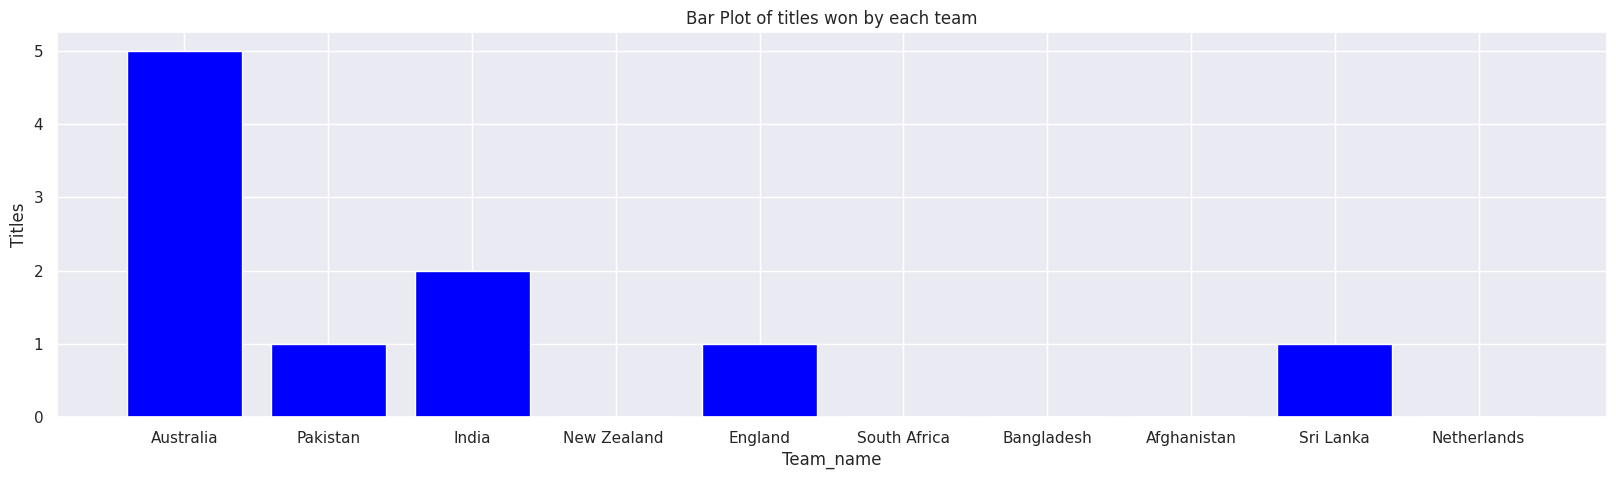

In [ ]:
team_name = wc['Team_name']
titles = wc['Titles']
sns.set(rc={'figure.figsize':(20, 5)})
plt.bar(team_name, titles, color='blue')

plt.xlabel('Team_name')
plt.ylabel('Titles')
plt.title('Bar Plot of titles won by each team')

plt.show()

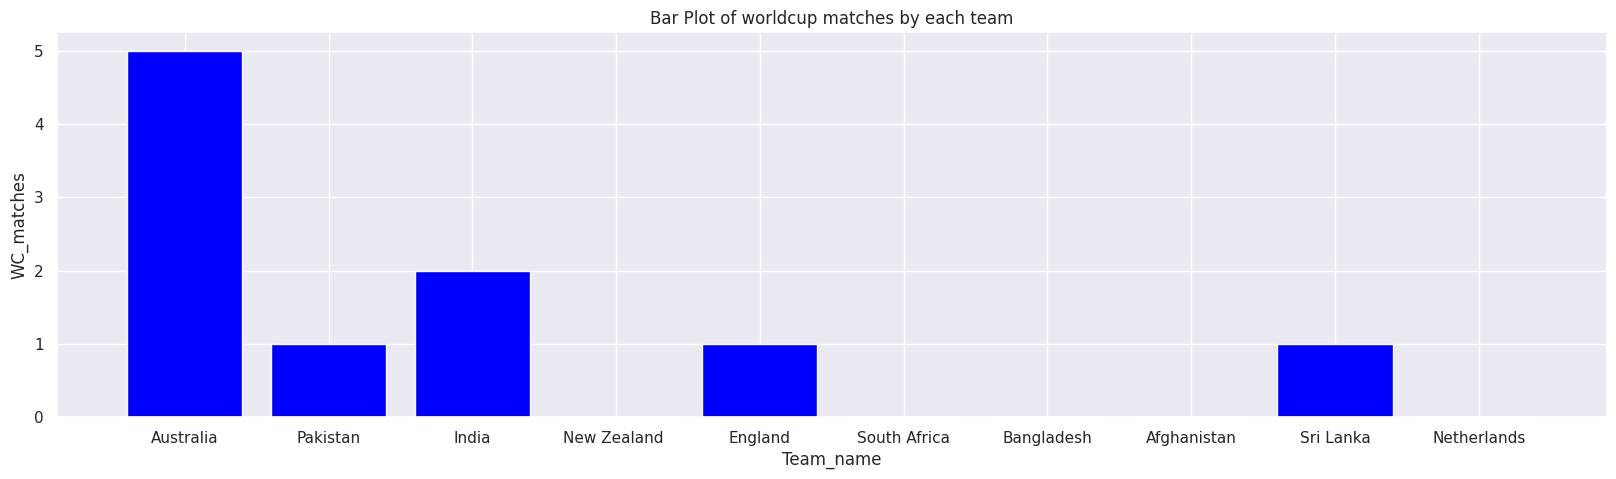

In [ ]:
team_name = wc['Team_name']
wc_matches = wc['WC_matches']
sns.set(rc={'figure.figsize':(20, 5)})
plt.bar(team_name, titles, color='blue')

plt.xlabel('Team_name')
plt.ylabel('WC_matches')
plt.title('Bar Plot of worldcup matches by each team')

plt.show()

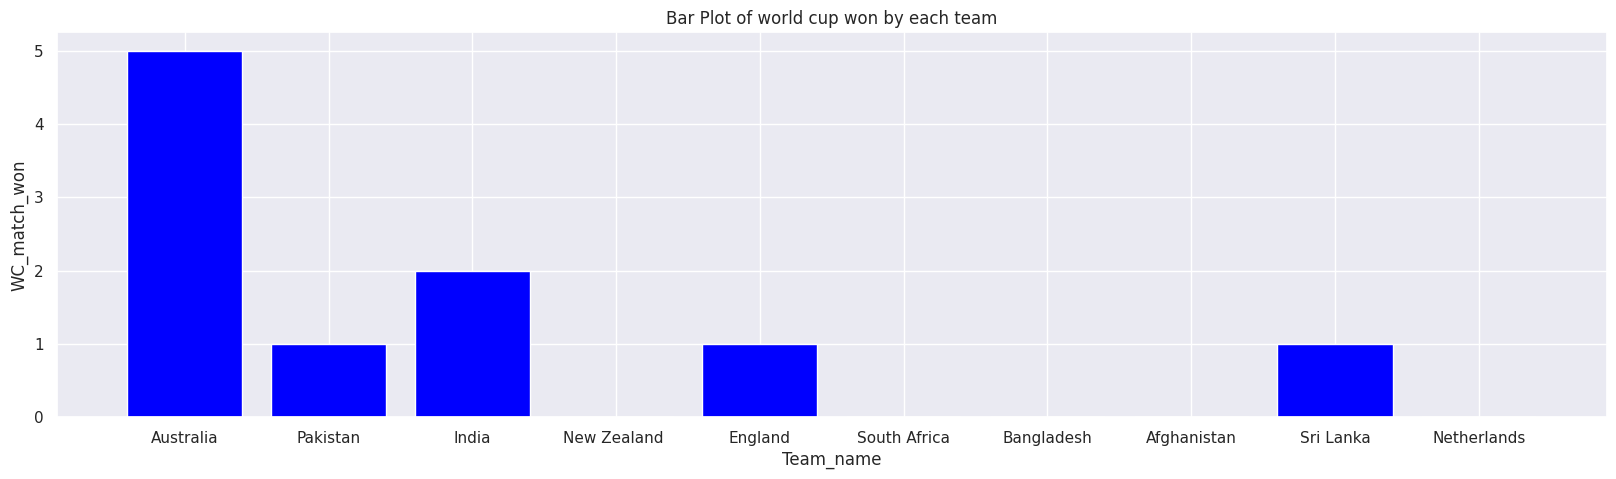

In [ ]:
team_name = wc['Team_name']
WC_match_won = wc['WC_match_won']
sns.set(rc={'figure.figsize':(20, 5)})
plt.bar(team_name, titles, color='blue')

plt.xlabel('Team_name')
plt.ylabel('WC_match_won')
plt.title('Bar Plot of world cup won by each team')

plt.show()

In [ ]:
results=pd.read_csv('/content/drive/MyDrive/dataminning/project3/results.csv')

In [ ]:
results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    722 non-null    object
 1   Team_1  722 non-null    object
 2   Team_2  722 non-null    object
 3   Winner  722 non-null    object
 4   Margin  722 non-null    object
 5   Ground  722 non-null    object
dtypes: object(6)
memory usage: 34.0+ KB


In [ ]:
results.describe()

,Date,Team_1,Team_2,Winner,Margin,Ground
count,722,722,722,722,722,722
unique,624,34,23,31,201,105
top,21/01/2022,England,India,India,won by 7 wickets,Harare Sports Club
freq,3,44,79,68,61,40


In [ ]:

results.shape

(722, 6)

In [ ]:

results.columns

Index(['Date', 'Team_1', 'Team_2', 'Winner', 'Margin', 'Ground'], dtype='object')

In [ ]:
results.isnull().sum()

Date      0
Team_1    0
Team_2    0
Winner    0
Margin    0
Ground    0
dtype: int64

In [ ]:
results['Team_1'].unique()

array(['Bangladesh ', 'Ireland ', 'Pakistan ', 'England ', 'England',
       'Bangladesh', 'Zimbabwe ', 'Sri Lanka ', 'South Africa',
       'South Africa ', 'India ', 'Zimbabwe', 'Sri Lanka', 'Pakistan',
       'Afghanistan ', 'New Zealand ', 'Australia ', 'New Zealand',
       'West Indies ', 'Australia', 'Scotland ', 'Ireland', 'India',
       'Afghanistan', 'West Indies', 'Netherlands ', 'Netherlands',
       'Hong Kong', 'Hong Kong ', 'India  ', 'Ireland  ', 'Scotland',
       'Oman', 'Nepal'], dtype=object)

Collecting details of team that is present in worldcup 2023

In [ ]:
worldcup_teams = ['England', 'South Africa', 'Netherlands',
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan',
            'Australia', 'Bangladesh', 'India']

df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]



In [ ]:

df_teams_1.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
29,19/08/2015,South Africa,New Zealand,South Africa,won by 20 runs,SuperSport Park
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
53,07/11/2015,Sri Lanka,West Indies,Sri Lanka,Sri Lanka won by 19 runs,Pallekele International Cricket Stadium


In [ ]:
df_teams_1['Team_1'].unique()

array(['England', 'Bangladesh', 'South Africa', 'Sri Lanka', 'Pakistan',
       'New Zealand', 'Australia', 'India', 'Afghanistan', 'Netherlands'],
      dtype=object)

In [ ]:
df_teams_2['Team_2'].unique()

array(['Pakistan', 'England', 'New Zealand', 'India', 'South Africa',
       'Australia', 'Afghanistan', 'Sri Lanka', 'Bangladesh',
       'Netherlands'], dtype=object)

In [ ]:
df_teams_1.shape

(259, 6)

In [ ]:
df_teams_2.shape

(567, 6)

In [ ]:


df1 = df_teams_1[df_teams_1['Team_2'].isin(worldcup_teams)]
df2=df_teams_2[df_teams_2['Team_1'].isin(worldcup_teams)]
df_teams = pd.concat((df1, df2))

In [ ]:
df_teams.shape

(370, 6)

In [ ]:
df_teams.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
29,19/08/2015,South Africa,New Zealand,South Africa,won by 20 runs,SuperSport Park
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
59,20/11/2015,Pakistan,England,England,England won by 84 runs,Dubai International Cricket Stadium


In [ ]:
df_teams['Team_1'].unique()

array(['England', 'Bangladesh', 'South Africa', 'Pakistan', 'New Zealand',
       'Australia', 'India', 'Sri Lanka', 'Afghanistan', 'Netherlands'],
      dtype=object)

In [ ]:
df_teams.drop(['Date','Margin','Ground'],axis=1)

,Team_1,Team_2,Winner
8,England,New Zealand,New Zealand
11,Bangladesh,India,Bangladesh
29,South Africa,New Zealand,South Africa
35,England,Australia,England
59,Pakistan,England,England
...,...,...,...
714,Netherlands,Sri Lanka,Sri Lanka
716,Bangladesh,Afghanistan,Afghanistan
719,Bangladesh,Afghanistan,Afghanistan
720,Netherlands,Sri Lanka,Sri Lanka


In [ ]:
df_teams.isnull().sum()

Date      0
Team_1    0
Team_2    0
Winner    0
Margin    0
Ground    0
dtype: int64

In [ ]:
df_trial=df_teams

In [ ]:
df_trial.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
29,19/08/2015,South Africa,New Zealand,South Africa,won by 20 runs,SuperSport Park
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
59,20/11/2015,Pakistan,England,England,England won by 84 runs,Dubai International Cricket Stadium


In [ ]:
df_trial=df_trial.drop(['Date','Margin','Ground'],axis=1)

Label encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

In [ ]:
df_trial

,Team_1,Team_2,Winner
8,England,New Zealand,New Zealand
11,Bangladesh,India,Bangladesh
29,South Africa,New Zealand,South Africa
35,England,Australia,England
59,Pakistan,England,England
...,...,...,...
714,Netherlands,Sri Lanka,Sri Lanka
716,Bangladesh,Afghanistan,Afghanistan
719,Bangladesh,Afghanistan,Afghanistan
720,Netherlands,Sri Lanka,Sri Lanka


In [ ]:
df_trial

,Team_1,Team_2,Winner
8,England,New Zealand,New Zealand
11,Bangladesh,India,Bangladesh
29,South Africa,New Zealand,South Africa
35,England,Australia,England
59,Pakistan,England,England
...,...,...,...
714,Netherlands,Sri Lanka,Sri Lanka
716,Bangladesh,Afghanistan,Afghanistan
719,Bangladesh,Afghanistan,Afghanistan
720,Netherlands,Sri Lanka,Sri Lanka


In [ ]:
categorical_columns = ['Team_1', 'Team_2','Winner']

label_mappings = {
    'Team_1': {'India': 0, 'South Africa': 1, 'Netherlands': 2, 'Pakistan': 3,'New Zealand': 4, 'Sri Lanka': 5, 'Afghanistan': 6,'Australia':7,'Bangladesh':8,'England':9},
    'Team_2': {'India': 0, 'South Africa': 1, 'Netherlands': 2, 'Pakistan': 3,'New Zealand': 4, 'Sri Lanka': 5, 'Afghanistan': 6,'Australia':7,'Bangladesh':8,'England':9},
    'Winner':{'India': 0, 'South Africa': 1, 'Netherlands': 2, 'Pakistan': 3,'New Zealand': 4, 'Sri Lanka': 5, 'Afghanistan': 6,'Australia':7,'Bangladesh':8,'England':9,
              'India ': 0, 'South Africa ': 1, 'Netherlands ': 2, 'Pakistan ': 3,'New Zealand ': 4, 'Sri Lanka ': 5, 'Afghanistan ': 6,'Australia ':7,'Bangladesh ':8,'England ':9}
}
for column in categorical_columns:
    mapping = label_mappings.get(column, {})
    df_trial[column + '_Encoded'] = df_trial[column].map(mapping)

df_trial.to_csv('your_encoded_file1.csv', index=False)

In [ ]:
dfe1=pd.read_csv('/content/your_encoded_file1.csv')

In [ ]:
dfe1.head()

,Team_1,Team_2,Winner,Team_1_Encoded,Team_2_Encoded,Winner_Encoded
0,England,New Zealand,New Zealand,9,4,4.0
1,Bangladesh,India,Bangladesh,8,0,8.0
2,South Africa,New Zealand,South Africa,1,4,1.0
3,England,Australia,England,9,7,9.0
4,Pakistan,England,England,3,9,9.0


In [ ]:
dfe1['Winner_Encoded'].isnull().sum()

32

In [ ]:
dfe1.shape

(370, 6)

In [ ]:
dfe1['Team_1'].isnull().sum()


0

In [ ]:
dfe1['Team_2'].isnull().sum()

0

In [ ]:
dfe1=dfe1.dropna()

In [ ]:
dfe1['Winner_Encoded'].isnull().sum()

0

In [ ]:
df_train=dfe1

In [ ]:
df_train.columns

Index(['Team_1', 'Team_2', 'Winner', 'Team_1_Encoded', 'Team_2_Encoded',
       'Winner_Encoded'],
      dtype='object')

In [ ]:
df_train=df_train.drop(['Team_1','Team_2','Winner'],axis=1)

In [ ]:
df_train.head()

,Team_1_Encoded,Team_2_Encoded,Winner_Encoded
0,9,4,4.0
1,8,0,8.0
2,1,4,1.0
3,9,7,9.0
4,3,9,9.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Modelling

In [ ]:
X = df_train.drop(['Winner_Encoded'], axis=1)
y = df_train["Winner_Encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(270, 2)
(270,)
(68, 2)
(68,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

score = rf.score(X_train, y_train)

score2 = rf.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))

print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.781
Test set accuracy:  0.691


Hyperparameter tunning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=10,max_features='auto',min_samples_leaf=2,min_samples_split=5)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

score = rf.score(X_train, y_train)

score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))

print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.774
Test set accuracy:  0.691


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print(y_test)

121    5.0
365    5.0
203    3.0
84     9.0
230    5.0
      ... 
197    7.0
81     8.0
18     3.0
74     4.0
119    9.0
Name: Winner_Encoded, Length: 68, dtype: float64


Creating new dataset for prediction

In [ ]:
fix=pd.read_csv('/content/drive/MyDrive/dataminning/project3/Fixtures.csv')
rank=pd.read_csv('/content/drive/MyDrive/dataminning/project3/Icc_ranking.csv')
matches=pd.read_csv('/content/drive/MyDrive/dataminning/project3/2023/matches.csv')

In [ ]:
pred_set = []
fix.insert(1, 'first_position', fix['Team_1'].map(rank.set_index('Team_name')['Team_ranking']))
fix.insert(2, 'second_position', fix['Team_2'].map(rank.set_index('Team_name')['Team_ranking']))

fix = fix.iloc[:45, :]
fix.head()

,Round_number,first_position,second_position,Team_1,Team_2,Date,Location,Group,Result
0,1,5.0,NaN,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,NaN,10.0,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,7.0,8.0,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,6.0,9.0,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,3.0,1.0,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN


In [ ]:
fix['first_position']=fix['first_position'].fillna(fix['first_position'].mean())
fix['second_position']=fix['second_position'].fillna(fix['second_position'].mean())
fix.head()

,Round_number,first_position,second_position,Team_1,Team_2,Date,Location,Group,Result
0,1,5.000000,7.119048,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,4.411765,10.000000,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,7.000000,8.000000,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,6.000000,9.000000,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,3.000000,1.000000,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN


In [ ]:
fix['Team_1'].isnull().sum()

0

In [ ]:
fix['Team_2'].isnull().sum()

0

In [ ]:
for index, row in fix.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})

pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,England,New Zealand,None
1,Pakistan,Netherlands,None
2,Bangladesh,Afghanistan,None
3,South Africa,Sri Lanka,None
4,Australia,India,None


In [ ]:
pred_set.isnull().sum()

Team_1           0
Team_2           0
winning_team    45
dtype: int64

In [ ]:
pred_set.columns

Index(['Team_1', 'Team_2', 'winning_team'], dtype='object')

Here

In [ ]:

pred_set = pred_set.drop(['winning_team'], axis=1)
pred_set.head()

,Team_1,Team_2
0,England,New Zealand
1,Pakistan,Netherlands
2,Bangladesh,Afghanistan
3,South Africa,Sri Lanka
4,Australia,India


In [ ]:
categorical_columns = ['Team_1', 'Team_2']

label_mappings = {
    'Team_1': {'India': 0, 'South Africa': 1, 'Netherlands': 2, 'Pakistan': 3,'New Zealand': 4, 'Sri Lanka': 5, 'Afghanistan': 6,'Australia':7,'Bangladesh':8,'England':9},
    'Team_2': {'India': 0, 'South Africa': 1, 'Netherlands': 2, 'Pakistan': 3,'New Zealand': 4, 'Sri Lanka': 5, 'Afghanistan': 6,'Australia':7,'Bangladesh':8,'England':9}

}
for column in categorical_columns:
    mapping = label_mappings.get(column, {})
    pred_set[column + '_Encoded'] = pred_set[column].map(mapping)


In [ ]:
pred_set.isnull().sum()

Team_1            0
Team_2            0
Team_1_Encoded    5
Team_2_Encoded    0
dtype: int64

In [ ]:
pred_set

,Team_1,Team_2,Team_1_Encoded,Team_2_Encoded
0,England,New Zealand,9.0,4
1,Pakistan,Netherlands,NaN,2
2,Bangladesh,Afghanistan,8.0,6
3,South Africa,Sri Lanka,1.0,5
4,Australia,India,7.0,0
5,New Zealand,Netherlands,4.0,2
6,England,Bangladesh,9.0,8
7,India,Afghanistan,0.0,6
8,Pakistan,Sri Lanka,NaN,5
9,Australia,South Africa,7.0,1


In [ ]:
rows_with_null = pred_set[pred_set.isnull().any(axis=1)]

print(rows_with_null)

       Team_1        Team_2  Team_1_Encoded  Team_2_Encoded
1   Pakistan    Netherlands             NaN               2
8   Pakistan      Sri Lanka             NaN               5
21  Pakistan    Afghanistan             NaN               6
25  Pakistan   South Africa             NaN               1
30  Pakistan     Bangladesh             NaN               8


In [ ]:

pred_set.loc[pred_set['Team_1'] == 'Pakistan ', 'Team_1_Encoded'] = 3


In [ ]:
rows_with_null = pred_set[pred_set.isnull().any(axis=1)]

print(rows_with_null)

Empty DataFrame
Columns: [Team_1, Team_2, Team_1_Encoded, Team_2_Encoded]
Index: []


In [ ]:
pred_set.columns

Index(['Team_1', 'Team_2', 'Team_1_Encoded', 'Team_2_Encoded'], dtype='object')

In [ ]:
pred_set = pred_set.drop(['Team_1', 'Team_2'], axis=1)

In [ ]:
pred_set.columns

Index(['Team_1_Encoded', 'Team_2_Encoded'], dtype='object')

In [ ]:
pred_set['Team_1_Encoded'].isnull().sum()

0

In [ ]:
pred_set['Team_2_Encoded'].isnull().sum()

0

In [ ]:
pred_set.shape

(45, 2)

In [ ]:
fix.shape[0]

45

In [ ]:
predictions = rf.predict(pred_set)
for i in range(fix.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " vs " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 0:
        print("Winner: India")

    elif predictions[i] == 1:
        print("Winner: South Africa")
    elif predictions[i] == 2:
        print("Winner: Netherlands")
    elif predictions[i] == 3:
        print("Winner: Pakistan")
    elif predictions[i] == 4:
        print("Winner: New Zealand")
    elif predictions[i] == 5:
        print("Winner: Sri Lanka")
    elif predictions[i] == 6:
        print("Winner: Afghanistan")
    elif predictions[i] == 7:
        print("Winner: Australia")
    elif predictions[i] == 8:
        print("Winner: Bangladesh")
    else:
        print("Winner: England")
    print("")

New Zealand vs England
Winner:  England

Netherlands vs Pakistan 
Winner:  Pakistan 

Afghanistan vs Bangladesh
Winner:  Afghanistan

Sri Lanka vs South Africa
Winner:  South Africa

India vs Australia
Winner:  Australia

Netherlands vs New Zealand
Winner:  New Zealand

Bangladesh vs England
Winner:  England

Afghanistan vs India
Winner:  India

Sri Lanka vs Pakistan 
Winner:  Pakistan 

South Africa vs Australia
Winner:  Australia

Bangladesh vs New Zealand
Winner:  New Zealand

Afghanistan vs England
Winner:  England

India vs Pakistan
Winner:  Pakistan

Sri Lanka vs Australia
Winner:  Australia

Netherlands vs South Africa
Winner:  South Africa

Afghanistan vs New Zealand
Winner:  New Zealand

Bangladesh vs India
Winner:  India

Pakistan vs Australia
Winner:  Australia

Netherlands vs Sri Lanka
Winner:  Sri Lanka

South Africa vs England
Winner:  England

New Zealand vs India
Winner:  India

Afghanistan vs Pakistan 
Winner:  Pakistan 

Bangladesh vs South Africa
Winner:  Bangladesh


In [ ]:
semi = [('Pakistan', 'Australia'),
            ('England', 'India')]

Predicting finalist(Task 2)

In [ ]:
def clean_and_predict(matches, rank, df_train, rf):
    positions = []

    for match in matches:
        positions.append(rank.loc[rank['Team_name'] == match[0], 'Team_ranking'].iloc[0])
        positions.append(rank.loc[rank['Team_name'] == match[0], 'Team_ranking'].iloc[0])

    pred_set = []

    i = 0
    j = 0
    while i < len(positions):
        dict1 = {}
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        pred_set.append(dict1)
        i += 2
        j += 1
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set
    print(pred_set.columns)
    label_mappings = {
    'Team_1': {'India': 0, 'South Africa': 1, 'Netherlands': 2, 'Pakistan': 3,'New Zealand': 4, 'Sri Lanka': 5, 'Afghanistan': 6,'Australia':7,'Bangladesh':8,'England':9},
    'Team_2': {'India': 0, 'South Africa': 1, 'Netherlands': 2, 'Pakistan': 3,'New Zealand': 4, 'Sri Lanka': 5, 'Afghanistan': 6,'Australia':7,'Bangladesh':8,'England':9}}

    for column in categorical_columns:
      mapping = label_mappings.get(column, {})  \
      pred_set[column + '_Encoded'] = pred_set[column].map(mapping)

    pred_set = pred_set.drop(['Team_1', 'Team_2'], axis=1)

    predictions = rf.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " vs " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

clean_and_predict(semi, rank, df_train, rf)


Index(['Team_1', 'Team_2'], dtype='object')
Pakistan vs Australia
Winner: Australia

England vs India
Winner: India



Predicting Winner(Task 3)

In [ ]:
finals = [('Australia', 'India')]
clean_and_predict(finals, rank, df_train, rf)

Index(['Team_1', 'Team_2'], dtype='object')
Australia vs India
Winner: India

